<a href="https://colab.research.google.com/github/adalal45/students-civic-engagement/blob/main/civic_engagement_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving sep23pub.csv to sep23pub.csv
Filtered dataset size: 7101 respondents
           participation_rate frequency_score
sex_group                                    
Female               0.146532        2.455056
Male                 0.112214        2.435972
              PES11     PES12     PES13     PES14     PES17
sex_group                                                  
Female     0.418646  0.096154  0.078459  0.179799   0.02937
Male       0.335301  0.061717  0.057245  0.152252  0.028751
               PES2      PES5      PES9     PES10
sex_group                                        
Female     3.949821  5.518915  5.422636  3.273639
Male       3.918626  5.538879   5.59726  3.217273


<Figure size 800x500 with 0 Axes>

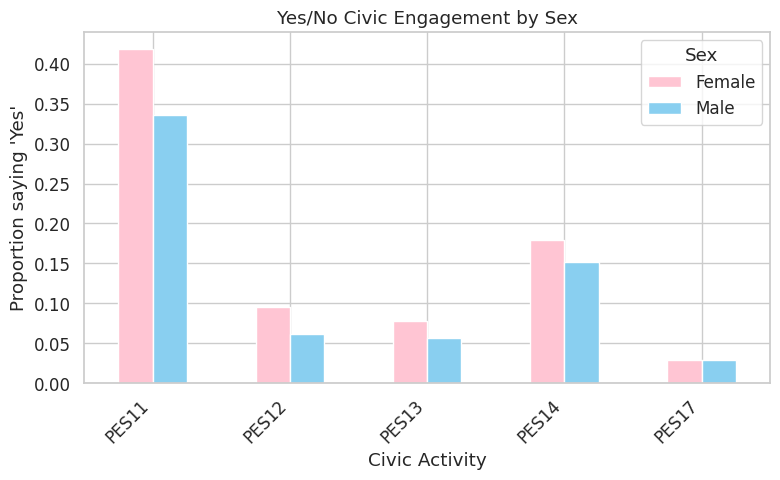

<Figure size 800x500 with 0 Axes>

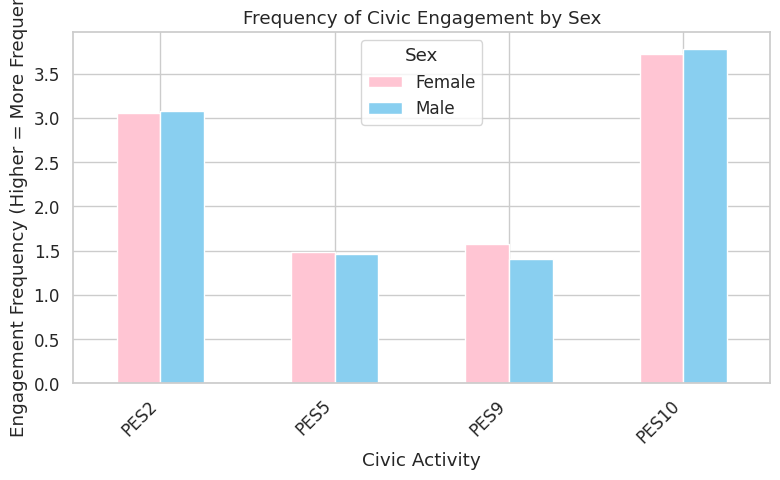

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('sep23pub.csv')

youth_df = df[df['PESCHENR'] == 1].copy()
print(f"Filtered dataset size: {len(youth_df)} respondents")

ordinal_cols = ['PES2', 'PES5', 'PES9', 'PES10']
yes_no_cols = ['PES11', 'PES12', 'PES13', 'PES14', 'PES17']

for col in yes_no_cols:
    youth_df[col] = youth_df[col].apply(
        lambda x: 1 if x == 1 else (0 if x == 2 else pd.NA)
    )

for col in ordinal_cols:
    youth_df[col] = youth_df[col].apply(
        lambda x: x if pd.notna(x) and 1 <= x <= 6 else pd.NA
    )

def classify_sex(value):
    if pd.isna(value):
        return 'Other/Unknown'
    try:
        v = int(value)
        if v == 1:
            return 'Male'
        elif v == 2:
            return 'Female'
        else:
            return 'Other/Unknown'
    except:
        return 'Other/Unknown'

youth_df['sex_group'] = youth_df['PESEX'].apply(classify_sex)

youth_df['participation_rate'] = youth_df[yes_no_cols].mean(axis=1)
youth_df['participation_rate'] = pd.to_numeric(youth_df['participation_rate'], errors='coerce')

youth_df['frequency_score'] = 7 - youth_df[ordinal_cols].mean(axis=1)

summary = youth_df.groupby('sex_group')[['participation_rate', 'frequency_score']].mean()
print(summary)

from scipy.stats import ttest_ind

ttest_ind(youth_df.loc[youth_df['sex_group']=='Female', 'participation_rate'].dropna(),
          youth_df.loc[youth_df['sex_group']=='Male', 'participation_rate'].dropna())

yes_no_by_sex = youth_df.groupby('sex_group')[yes_no_cols].mean()
print(yes_no_by_sex)

ordinal_by_sex = youth_df.groupby('sex_group')[ordinal_cols].mean()
print(ordinal_by_sex)

sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(8, 5))
yes_no_by_sex.T.plot(kind='bar', figsize=(8,5), color=['#ffc5d3', '#89CFF0'])
plt.title("Yes/No Civic Engagement by Sex")
plt.ylabel("Proportion saying 'Yes'")
plt.xlabel("Civic Activity")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
(7 - ordinal_by_sex).T.plot(kind='bar', figsize=(8,5), color=['#ffc5d3', '#89CFF0'])
plt.title("Frequency of Civic Engagement by Sex")
plt.ylabel("Engagement Frequency (Higher = More Frequent)")
plt.xlabel("Civic Activity")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

Filtered dataset size: 7101 respondents

=== Summary by Race ===
                                  participation_rate  frequency_score
race_group                                                           
American Indian/Alaska Native               0.128205         2.443750
Asian                                       0.095175         2.522163
Black                                       0.104341         2.371795
Mixed                                       0.084234         2.241742
Native Hawaiian/Pacific Islander            0.179167         3.104167
White                                       0.142024         2.459539

ANOVA result for participation_rate by race group:
F_onewayResult(statistic=np.float64(5.118159586240068), pvalue=np.float64(0.00011267749689487612))

=== Yes/No Civic Participation (by Race) ===
                                     PES11     PES12     PES13     PES14  \
race_group                                                                 
American Indian/Alaska Nat

<Figure size 900x600 with 0 Axes>

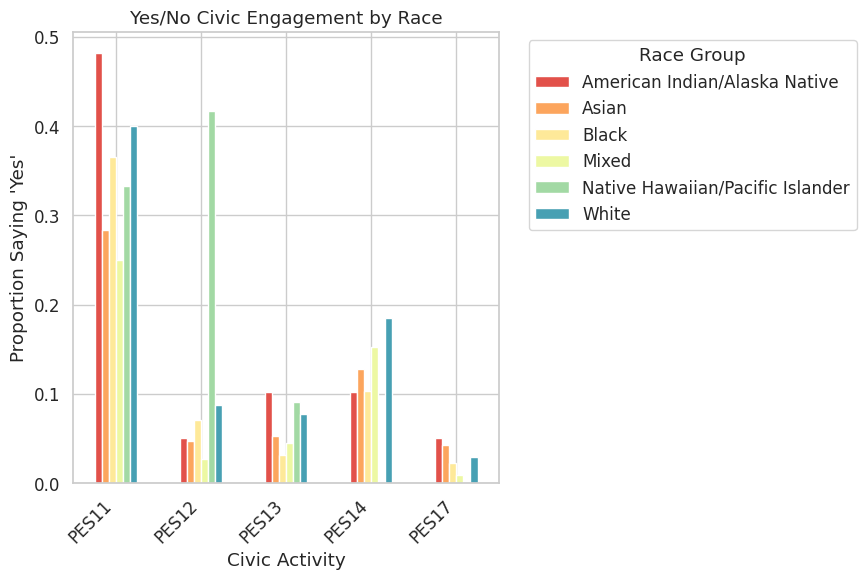

<Figure size 900x600 with 0 Axes>

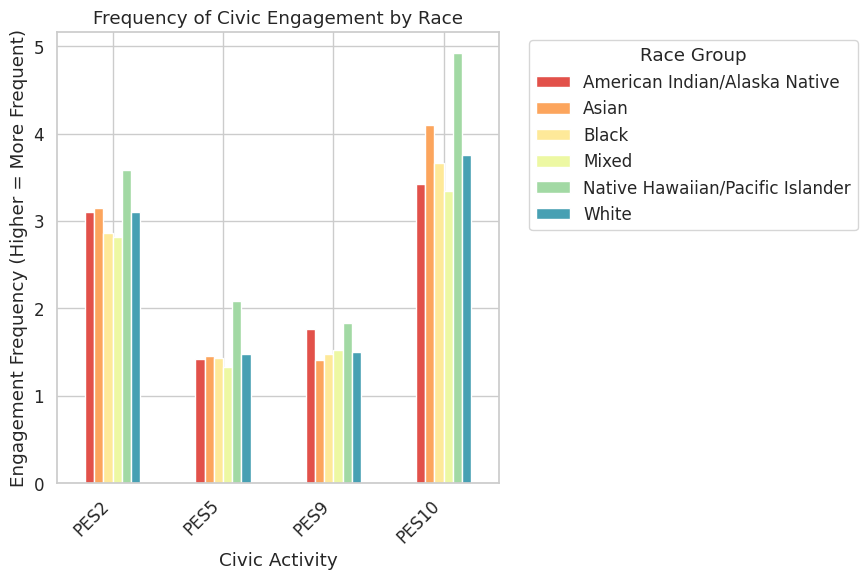

race_group
White                               5298
Black                                847
Asian                                521
Mixed                                303
American Indian/Alaska Native        102
Native Hawaiian/Pacific Islander      30
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

df = pd.read_csv('sep23pub.csv')

youth_df = df[df['PESCHENR'] == 1].copy()
print(f"Filtered dataset size: {len(youth_df)} respondents")

ordinal_cols = ['PES2', 'PES5', 'PES9', 'PES10']
yes_no_cols = ['PES11', 'PES12', 'PES13', 'PES14', 'PES17']

for col in yes_no_cols:
    youth_df[col] = youth_df[col].apply(lambda x: 1 if x == 1 else (0 if x == 2 else pd.NA))

for col in ordinal_cols:
    youth_df[col] = youth_df[col].apply(lambda x: x if pd.notna(x) and 1 <= x <= 6 else pd.NA)

def classify_race(value):
    if pd.isna(value):
        return 'Other/Unknown'
    try:
        v = int(value)
        if v == 1:
            return 'White'
        elif v == 2:
            return 'Black'
        elif v == 3:
            return 'American Indian/Alaska Native'
        elif v == 4:
            return 'Asian'
        elif v == 5:
            return 'Native Hawaiian/Pacific Islander'
        else:
            return 'Mixed'
    except:
        return 'Other/Unknown'

youth_df['race_group'] = youth_df['PTDTRACE'].apply(classify_race)

youth_df['participation_rate'] = pd.to_numeric(youth_df[yes_no_cols].mean(axis=1), errors='coerce')
youth_df['frequency_score'] = pd.to_numeric(7 - youth_df[ordinal_cols].mean(axis=1), errors='coerce')

summary = youth_df.groupby('race_group')[['participation_rate', 'frequency_score']].mean()
print("\n=== Summary by Race ===")
print(summary)

groups = [
    youth_df.loc[youth_df['race_group'] == g, 'participation_rate'].dropna()
    for g in youth_df['race_group'].unique()
    if len(youth_df.loc[youth_df['race_group'] == g, 'participation_rate'].dropna()) > 1
]

anova_result = f_oneway(*groups)
print("\nANOVA result for participation_rate by race group:")
print(anova_result)

yes_no_by_race = youth_df.groupby('race_group')[yes_no_cols].mean()
ordinal_by_race = youth_df.groupby('race_group')[ordinal_cols].mean()

print("\n=== Yes/No Civic Participation (by Race) ===")
print(yes_no_by_race)
print("\n=== Ordinal Civic Frequency (by Race) ===")
print(ordinal_by_race)

sns.set(style="whitegrid", font_scale=1.1)
palette = sns.color_palette("Spectral", n_colors=len(yes_no_by_race))

plt.figure(figsize=(9, 6))
yes_no_by_race.T.plot(kind='bar', figsize=(9,6), color=palette)
plt.title("Yes/No Civic Engagement by Race")
plt.ylabel("Proportion Saying 'Yes'")
plt.xlabel("Civic Activity")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Race Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 6))
(7 - ordinal_by_race).T.plot(kind='bar', figsize=(9,6), color=palette)
plt.title("Frequency of Civic Engagement by Race")
plt.ylabel("Engagement Frequency (Higher = More Frequent)")
plt.xlabel("Civic Activity")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Race Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

race_counts = youth_df['race_group'].value_counts(dropna=False)
print(race_counts)

Filtered dataset size: 7101 respondents

=== Summary by Income ===
              participation_rate  frequency_score
income_group                                     
High Income             0.153905         2.575052
Low Income              0.101407         2.435575
Lower Middle            0.129502         2.359455
Upper Middle            0.155471         2.537704

ANOVA result for participation_rate by income group:
F_onewayResult(statistic=np.float64(9.121028676396211), pvalue=np.float64(5.290582207375392e-06))

=== Yes/No Civic Participation (by Income) ===
                 PES11     PES12     PES13     PES14     PES17
income_group                                                  
High Income   0.453258  0.109015  0.086134  0.191489  0.038217
Low Income    0.301031  0.053834  0.052288  0.138158  0.019672
Lower Middle  0.378897  0.079731  0.063401    0.1625  0.031761
Upper Middle  0.442308  0.092072  0.089514  0.198454  0.025707

=== Ordinal Civic Frequency (by Income) ===
          

<Figure size 900x600 with 0 Axes>

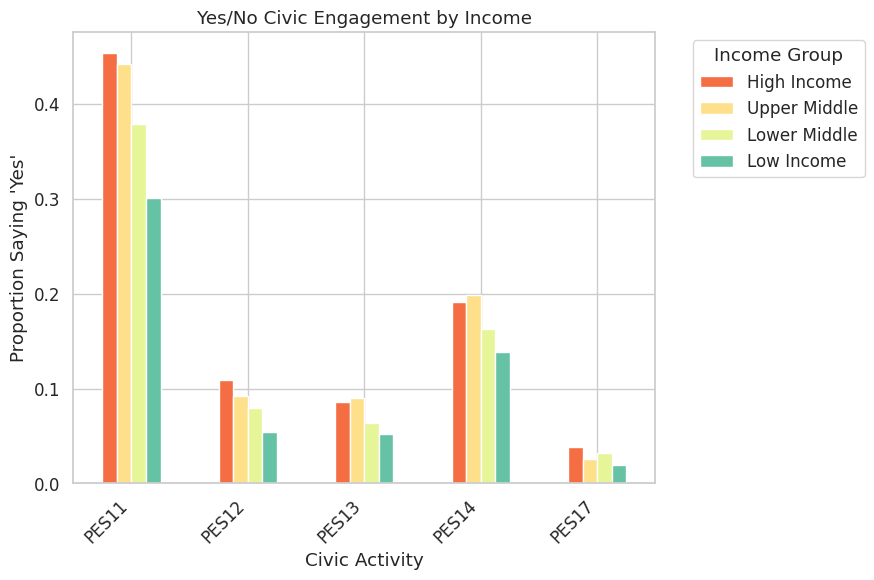

<Figure size 900x600 with 0 Axes>

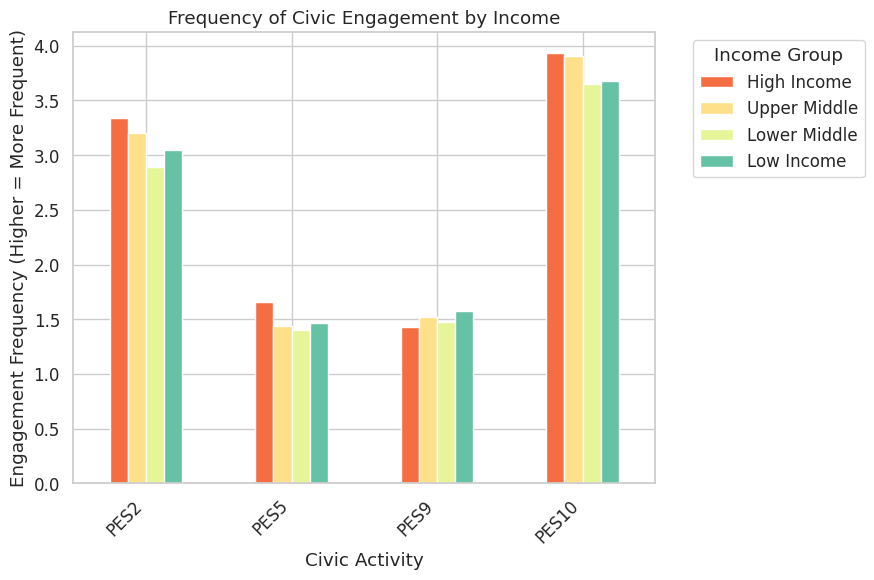

income_group
Lower Middle    2712
High Income     1740
Low Income      1372
Upper Middle    1277
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

df = pd.read_csv('sep23pub.csv')

youth_df = df[df['PESCHENR'] == 1].copy()
print(f"Filtered dataset size: {len(youth_df)} respondents")

ordinal_cols = ['PES2', 'PES5', 'PES9', 'PES10']
yes_no_cols = ['PES11', 'PES12', 'PES13', 'PES14', 'PES17']

for col in yes_no_cols:
    youth_df[col] = youth_df[col].apply(lambda x: 1 if x == 1 else (0 if x == 2 else pd.NA))

for col in ordinal_cols:
    youth_df[col] = youth_df[col].apply(lambda x: x if pd.notna(x) and 1 <= x <= 6 else pd.NA)

def classify_income(value):
    if pd.isna(value):
        return 'Other/Unknown'
    try:
        v = int(value)
        if (v >= 1 and v <= 9):
            return 'Low Income'
        elif (v >= 10 and v <= 14):
            return 'Lower Middle'
        elif v==15:
            return 'Upper Middle'
        elif v==16:
            return 'High Income'
        else:
            return 'Other'
    except:
        return 'Other/Unknown'

youth_df['income_group'] = youth_df['HEFAMINC'].apply(classify_income)

youth_df['participation_rate'] = pd.to_numeric(youth_df[yes_no_cols].mean(axis=1), errors='coerce')
youth_df['frequency_score'] = pd.to_numeric(7 - youth_df[ordinal_cols].mean(axis=1), errors='coerce')

summary = youth_df.groupby('income_group')[['participation_rate', 'frequency_score']].mean()
print("\n=== Summary by Income ===")
print(summary)

groups = [
    youth_df.loc[youth_df['income_group'] == g, 'participation_rate'].dropna()
    for g in youth_df['income_group'].unique()
    if len(youth_df.loc[youth_df['income_group'] == g, 'participation_rate'].dropna()) > 1
]

anova_result = f_oneway(*groups)
print("\nANOVA result for participation_rate by income group:")
print(anova_result)

yes_no_by_income = youth_df.groupby('income_group')[yes_no_cols].mean()
ordinal_by_income = youth_df.groupby('income_group')[ordinal_cols].mean()

print("\n=== Yes/No Civic Participation (by Income) ===")
print(yes_no_by_income)
print("\n=== Ordinal Civic Frequency (by Income) ===")
print(ordinal_by_income)

income_order = ["High Income", "Upper Middle", "Lower Middle", "Low Income"]
yes_no_by_income = yes_no_by_income.reindex(income_order)
ordinal_by_income = ordinal_by_income.reindex(income_order)

sns.set(style="whitegrid", font_scale=1.1)
palette = sns.color_palette("Spectral", n_colors=len(yes_no_by_income))

plt.figure(figsize=(9, 6))
yes_no_by_income.T.plot(kind='bar', figsize=(9,6), color=palette)
plt.title("Yes/No Civic Engagement by Income")
plt.ylabel("Proportion Saying 'Yes'")
plt.xlabel("Civic Activity")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 6))
(7 - ordinal_by_income).T.plot(kind='bar', figsize=(9,6), color=palette)
plt.title("Frequency of Civic Engagement by Income")
plt.ylabel("Engagement Frequency (Higher = More Frequent)")
plt.xlabel("Civic Activity")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

income_counts = youth_df['income_group'].value_counts(dropna=False)
print(income_counts)


Filtered dataset size: 7101 respondents

=== Average Civic Engagement by Education Level ===
                    participation_rate  frequency_score
education_group                                        
College/University            0.167989         2.605000
High School                   0.048802         2.090822

ANOVA result for participation_rate by education group:
F_onewayResult(statistic=np.float64(219.45676199481082), pvalue=np.float64(1.1173941274968868e-47))

=== Yes/No Civic Participation (by Education Level) ===
                       PES11     PES12     PES13     PES14     PES17
education_group                                                     
College/University  0.449749  0.099084  0.087679  0.204152  0.034562
High School         0.112245  0.039948  0.027097  0.085492  0.016818

=== Ordinal Civic Frequency (by Education Level) ===
                        PES2      PES5      PES9     PES10
education_group                                           
College/University  3

<Figure size 900x600 with 0 Axes>

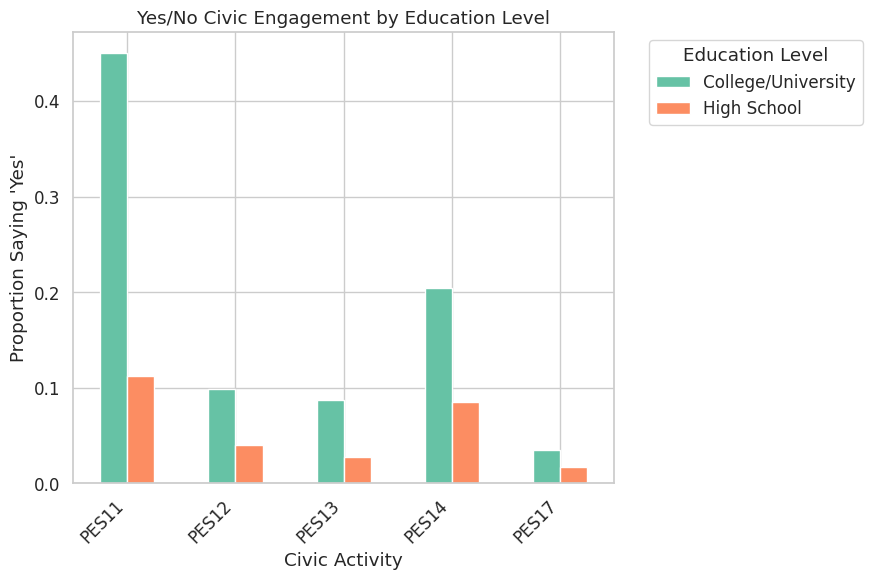

<Figure size 900x600 with 0 Axes>

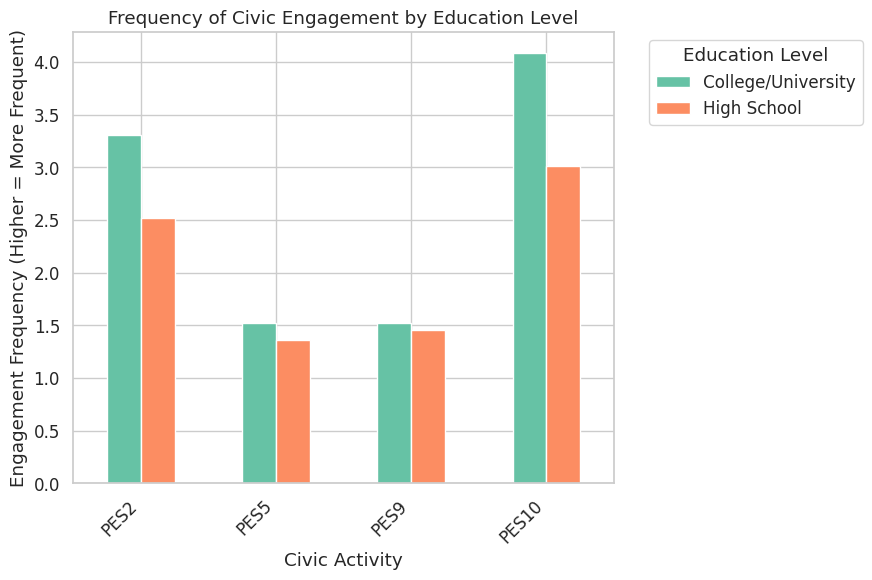


Respondents per group:
education_group
College/University    4379
High School           2722
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

df = pd.read_csv('sep23pub.csv')

students_df = df[df['PESCHENR'] == 1].copy()
print(f"Filtered dataset size: {len(students_df)} respondents")

ordinal_cols = ['PES2', 'PES5', 'PES9', 'PES10']
yes_no_cols = ['PES11', 'PES12', 'PES13', 'PES14', 'PES17']

for col in yes_no_cols:
    students_df[col] = students_df[col].apply(lambda x: 1 if x == 1 else (0 if x == 2 else pd.NA))

for col in ordinal_cols:
    students_df[col] = students_df[col].apply(lambda x: x if pd.notna(x) and 1 <= x <= 6 else pd.NA)

def classify_education(value):
    if value == 1:
        return "High School"
    elif value == 2:
        return "College/University"
    else:
        return "Other/Unknown"

students_df['education_group'] = students_df['PESCHLVL'].apply(classify_education)

students_df['participation_rate'] = pd.to_numeric(students_df[yes_no_cols].mean(axis=1), errors='coerce')
students_df['frequency_score'] = pd.to_numeric(7 - students_df[ordinal_cols].mean(axis=1), errors='coerce')

summary = students_df.groupby('education_group')[['participation_rate', 'frequency_score']].mean()
print("\n=== Average Civic Engagement by Education Level ===")
print(summary)

groups = [
    students_df.loc[students_df['education_group'] == g, 'participation_rate'].dropna()
    for g in students_df['education_group'].unique()
    if len(students_df.loc[students_df['education_group'] == g, 'participation_rate'].dropna()) > 1
]

anova_result = f_oneway(*groups)
print("\nANOVA result for participation_rate by education group:")
print(anova_result)

yes_no_by_ed = students_df.groupby('education_group')[yes_no_cols].mean()
ordinal_by_ed = students_df.groupby('education_group')[ordinal_cols].mean()

print("\n=== Yes/No Civic Participation (by Education Level) ===")
print(yes_no_by_ed)
print("\n=== Ordinal Civic Frequency (by Education Level) ===")
print(ordinal_by_ed)

sns.set(style="whitegrid", font_scale=1.1)
palette = sns.color_palette("Set2", n_colors=len(yes_no_by_ed))

plt.figure(figsize=(9, 6))
yes_no_by_ed.T.plot(kind='bar', figsize=(9,6), color=palette)
plt.title("Yes/No Civic Engagement by Education Level")
plt.ylabel("Proportion Saying 'Yes'")
plt.xlabel("Civic Activity")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 6))
(7 - ordinal_by_ed).T.plot(kind='bar', figsize=(9,6), color=palette)
plt.title("Frequency of Civic Engagement by Education Level")
plt.ylabel("Engagement Frequency (Higher = More Frequent)")
plt.xlabel("Civic Activity")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

counts = students_df['education_group'].value_counts(dropna=False)
print("\nRespondents per group:")
print(counts)


Filtered dataset size: 7101 respondents

=== Summary by Area ===
                 participation_rate  frequency_score
area_group                                          
Balance                    0.123288         2.421199
Nonmetropolitan            0.125420         2.401279
Not Identified             0.140119         2.367671
Principal City             0.139955         2.549145

ANOVA result for participation_rate by principal city/balance status:
F_onewayResult(statistic=np.float64(1.440289379924977), pvalue=np.float64(0.22910710742765536))

=== Yes/No Civic Participation (by Area) ===
                    PES11     PES12     PES13     PES14     PES17
area_group                                                       
Balance          0.364738  0.077813   0.06204  0.160847   0.02328
Nonmetropolitan  0.378462  0.096154  0.077482  0.125908  0.021739
Not Identified   0.390029  0.090909  0.069378   0.17506    0.0358
Principal City   0.405217  0.070556  0.073171  0.195622  0.036936

=== Ord

<Figure size 900x600 with 0 Axes>

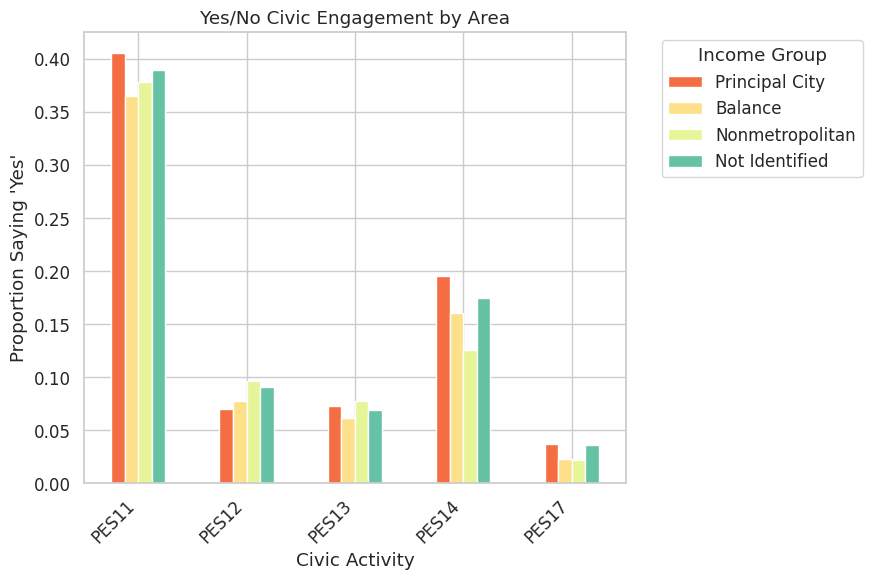

<Figure size 900x600 with 0 Axes>

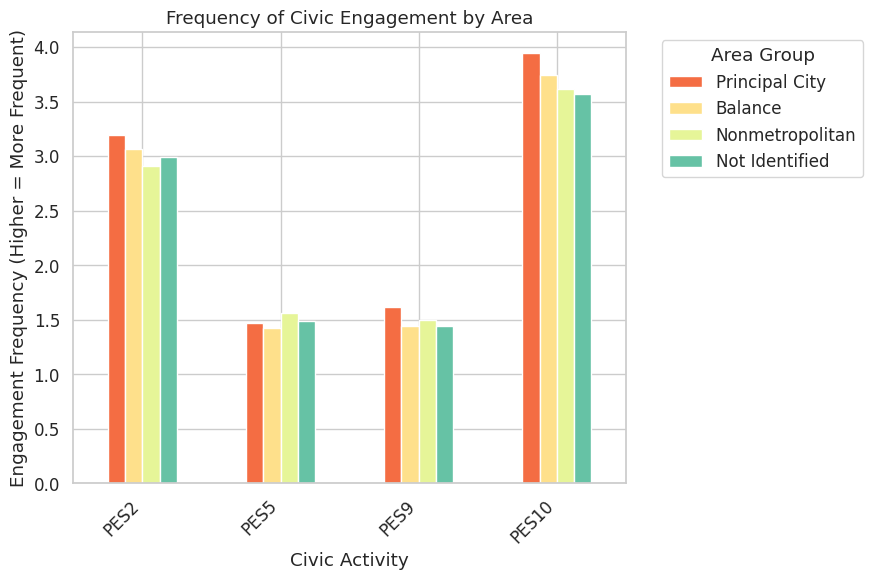

area_group
Balance            2959
Principal City     1875
Not Identified     1167
Nonmetropolitan    1100
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

df = pd.read_csv('sep23pub.csv')

youth_df = df[df['PESCHENR'] == 1].copy()
print(f"Filtered dataset size: {len(youth_df)} respondents")

ordinal_cols = ['PES2', 'PES5', 'PES9', 'PES10']
yes_no_cols = ['PES11', 'PES12', 'PES13', 'PES14', 'PES17']

for col in yes_no_cols + ordinal_cols:
    youth_df[col] = pd.to_numeric(youth_df[col], errors='coerce')

for col in yes_no_cols:
    youth_df[col] = youth_df[col].apply(lambda x: 1 if x == 1 else (0 if x == 2 else pd.NA))

for col in ordinal_cols:
    youth_df[col] = youth_df[col].apply(lambda x: x if pd.notna(x) and 1 <= x <= 6 else pd.NA)

def classify_area(value):
    if pd.isna(value):
        return 'Other/Unknown'
    try:
        v = int(value)
        if v==1:
            return 'Principal City'
        elif v==2:
            return 'Balance'
        elif v==3:
            return 'Nonmetropolitan'
        else:
            return 'Not Identified'
    except:
        return 'Other/Unknown'

youth_df['area_group'] = youth_df['GTCBSAST'].apply(classify_area)

youth_df['participation_rate'] = pd.to_numeric(youth_df[yes_no_cols].mean(axis=1), errors='coerce')
youth_df['frequency_score'] = pd.to_numeric(7 - youth_df[ordinal_cols].mean(axis=1), errors='coerce')

summary = youth_df.groupby('area_group')[['participation_rate', 'frequency_score']].mean()
print("\n=== Summary by Area ===")
print(summary)

groups = [
    youth_df.loc[youth_df['area_group'] == g, 'participation_rate'].dropna()
    for g in youth_df['area_group'].unique()
    if len(youth_df.loc[youth_df['area_group'] == g, 'participation_rate'].dropna()) > 1
]

anova_result = f_oneway(*groups)
print("\nANOVA result for participation_rate by principal city/balance status:")
print(anova_result)

yes_no_by_area = youth_df.groupby('area_group')[yes_no_cols].mean()
ordinal_by_area = youth_df.groupby('area_group')[ordinal_cols].mean()

print("\n=== Yes/No Civic Participation (by Area) ===")
print(yes_no_by_area)
print("\n=== Ordinal Civic Frequency (by Area) ===")
print(ordinal_by_area)

area_order = ["Principal City", "Balance", "Nonmetropolitan", "Not Identified"]
yes_no_by_area = yes_no_by_area.reindex(area_order)
ordinal_by_area = ordinal_by_area.reindex(area_order)

sns.set(style="whitegrid", font_scale=1.1)
palette = sns.color_palette("Spectral", n_colors=len(yes_no_by_area))

plt.figure(figsize=(9, 6))
yes_no_by_area.T.plot(kind='bar', figsize=(9,6), color=palette)
plt.title("Yes/No Civic Engagement by Area")
plt.ylabel("Proportion Saying 'Yes'")
plt.xlabel("Civic Activity")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 6))
(7 - ordinal_by_area).T.plot(kind='bar', figsize=(9,6), color=palette)
plt.title("Frequency of Civic Engagement by Area")
plt.ylabel("Engagement Frequency (Higher = More Frequent)")
plt.xlabel("Civic Activity")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Area Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

area_counts = youth_df['area_group'].value_counts(dropna=False)
print(area_counts)


Filtered dataset size: 7101 respondents

=== Summary by Race ===
                                  participation_rate  frequency_score
race_group                                                           
American Indian/Alaska Native               0.128205         2.443750
Asian                                       0.095175         2.522163
Black                                       0.104341         2.371795
Mixed                                       0.084234         2.241742
Native Hawaiian/Pacific Islander            0.179167         3.104167
White                                       0.142024         2.459539

=== Summary by Race and Sex ===
                          race_group sex_group  participation_rate  \
0      American Indian/Alaska Native    Female            0.161905   
1      American Indian/Alaska Native      Male            0.088889   
2                              Asian    Female            0.101375   
3                              Asian      Male            0.08

/tmp/ipython-input-1161687971.py:102: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


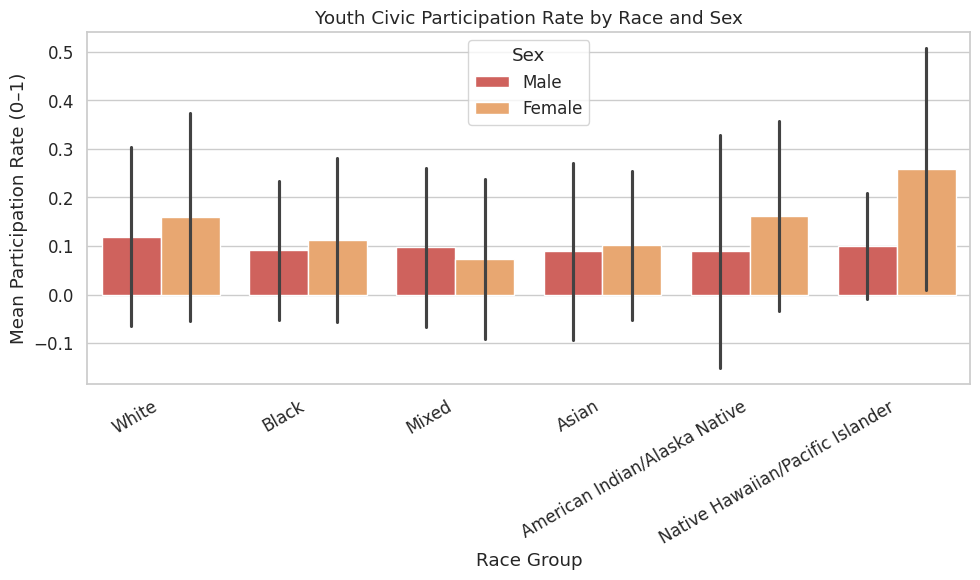

/tmp/ipython-input-1161687971.py:118: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


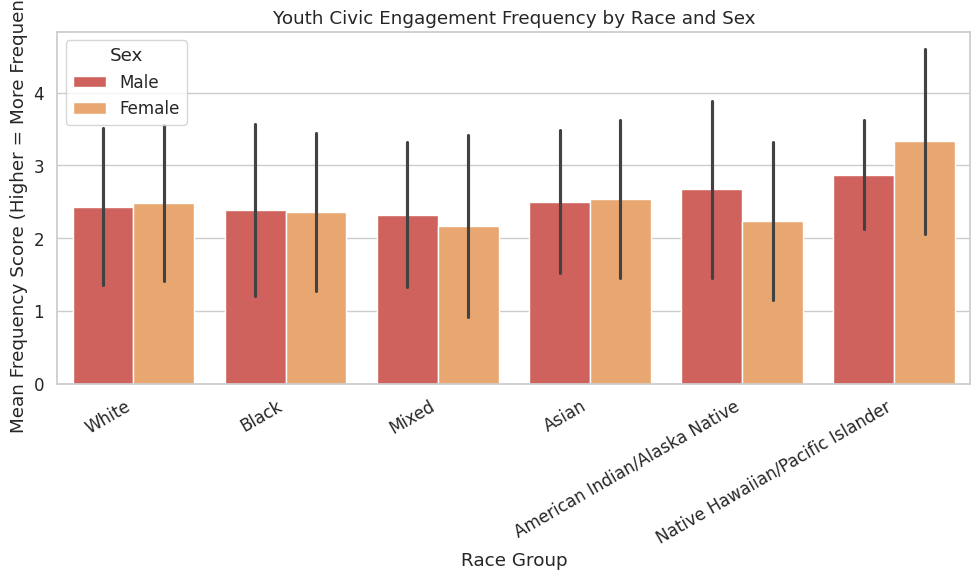

/tmp/ipython-input-1161687971.py:133: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


                          race_group sex_group  count
0      American Indian/Alaska Native    Female     50
1      American Indian/Alaska Native      Male     52
2                              Asian    Female    259
3                              Asian      Male    262
4                              Black    Female    494
5                              Black      Male    353
6                              Mixed    Female    161
7                              Mixed      Male    142
8   Native Hawaiian/Pacific Islander    Female     15
9   Native Hawaiian/Pacific Islander      Male     15
10                             White    Female   2826
11                             White      Male   2472


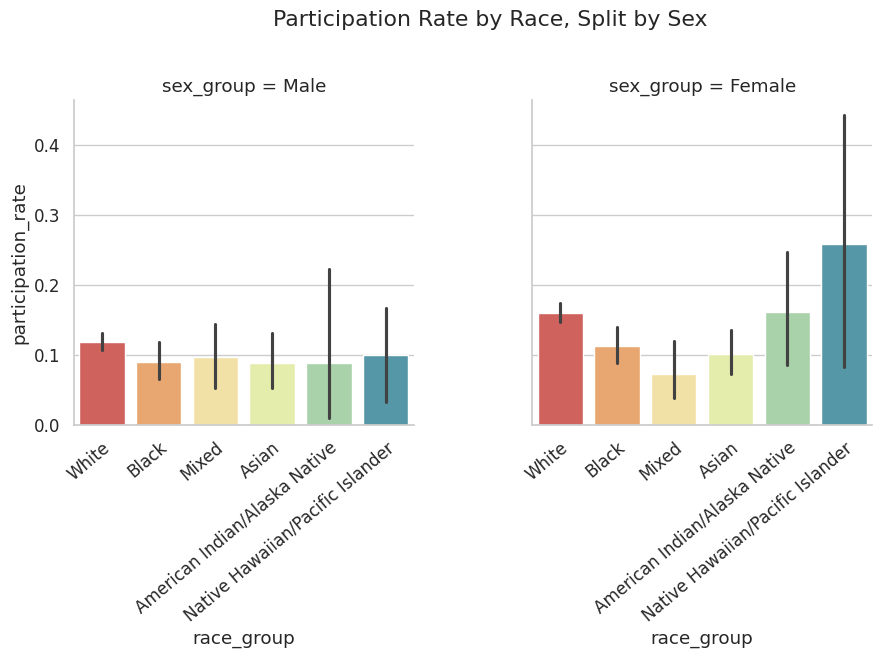

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

df = pd.read_csv('sep23pub.csv')

youth_df = df[df['PESCHENR'] == 1].copy()
print(f"Filtered dataset size: {len(youth_df)} respondents")

ordinal_cols = ['PES2', 'PES5', 'PES9', 'PES10']
yes_no_cols = ['PES11', 'PES12', 'PES13', 'PES14', 'PES17']

for col in yes_no_cols:
    youth_df[col] = youth_df[col].apply(lambda x: 1 if x == 1 else (0 if x == 2 else pd.NA))

for col in ordinal_cols:
    youth_df[col] = youth_df[col].apply(lambda x: x if pd.notna(x) and 1 <= x <= 6 else pd.NA)

def classify_race(value):
    if pd.isna(value):
        return 'Other/Unknown'
    try:
        v = int(value)
        if v == 1:
            return 'White'
        elif v == 2:
            return 'Black'
        elif v == 3:
            return 'American Indian/Alaska Native'
        elif v == 4:
            return 'Asian'
        elif v == 5:
            return 'Native Hawaiian/Pacific Islander'
        else:
            return 'Mixed'
    except:
        return 'Other/Unknown'

youth_df['race_group'] = youth_df['PTDTRACE'].apply(classify_race)

youth_df['participation_rate'] = pd.to_numeric(youth_df[yes_no_cols].mean(axis=1), errors='coerce')
youth_df['frequency_score'] = pd.to_numeric(7 - youth_df[ordinal_cols].mean(axis=1), errors='coerce')

summary = youth_df.groupby('race_group')[['participation_rate', 'frequency_score']].mean()
print("\n=== Summary by Race ===")
print(summary)

def classify_sex(value):
    if value == 1:
        return 'Male'
    elif value == 2:
        return 'Female'
    else:
        return 'Other/Unknown'

youth_df['sex_group'] = youth_df['PESEX'].apply(classify_sex)

summary_two = (
    youth_df
    .groupby(['race_group', 'sex_group'])[['participation_rate', 'frequency_score']]
    .mean()
    .reset_index()
)
print("\n=== Summary by Race and Sex ===")
print(summary_two)

import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_df = youth_df.dropna(subset=['participation_rate', 'race_group', 'sex_group'])
model1 = ols('participation_rate ~ C(race_group) + C(sex_group) + C(race_group):C(sex_group)', data=anova_df).fit()
anova_table1 = sm.stats.anova_lm(model1, typ=2)
print("\n=== Two-Way ANOVA: participation_rate ===")
print(anova_table1)

anova_df2 = youth_df.dropna(subset=['frequency_score', 'race_group', 'sex_group'])
model2 = ols('frequency_score ~ C(race_group) + C(sex_group) + C(race_group):C(sex_group)', data=anova_df2).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
print("\n=== Two-Way ANOVA: frequency_score ===")
print(anova_table2)

sns.set(style="whitegrid", font_scale=1.1, palette="Spectral")

plt.figure(figsize=(10,6))
sns.barplot(
    data=youth_df,
    x='race_group', y='participation_rate',
    hue='sex_group',
    estimator='mean', ci='sd'
)
plt.title("Youth Civic Participation Rate by Race and Sex")
plt.ylabel("Mean Participation Rate (0–1)")
plt.xlabel("Race Group")
plt.xticks(rotation=30, ha='right')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(
    data=youth_df,
    x='race_group', y='frequency_score',
    hue='sex_group',
    estimator='mean', ci='sd'
)
plt.title("Youth Civic Engagement Frequency by Race and Sex")
plt.ylabel("Mean Frequency Score (Higher = More Frequent)")
plt.xlabel("Race Group")
plt.xticks(rotation=30, ha='right')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

g = sns.catplot(
    data=youth_df,
    x='race_group', y='participation_rate',
    col='sex_group',
    kind='bar', palette='Spectral',
    height=5, aspect=1
)

plt.subplots_adjust(top=0.8)
g.fig.suptitle("Participation Rate by Race, Split by Sex")

for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(),
             rotation=40, ha='right', rotation_mode='anchor')  # << key part

group_counts = (
    youth_df
    .groupby(['race_group', 'sex_group'])
    .size()
    .reset_index(name='count')
)
print(group_counts)

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sep23pub.csv')

youth_df = df[df['PESCHENR'] == 1].copy()
print(f"Filtered dataset size: {len(youth_df)} respondents")

ordinal_cols = ['PES2', 'PES5', 'PES9', 'PES10']  # 1–6 scale
yes_no_cols = ['PES11', 'PES12', 'PES13', 'PES14', 'PES17']  # 1 = Yes, 2 = No
nativity_col = 'PENATVTY'

for col in yes_no_cols:
    youth_df[col] = youth_df[col].apply(
        lambda x: 1 if x == 1 else (0 if x == 2 else pd.NA)
    )

for col in ordinal_cols:
    youth_df[col] = youth_df[col].apply(
        lambda x: x if pd.notna(x) and 1 <= x <= 6 else pd.NA
    )

def classify_nativity(value):
    if pd.isna(value):
        return 'Other/Unknown'
    try:
        v = int(value)
        if v == 57:
            return 'US-born'
        elif 100 <= v <= 554:
            return 'Immigrant'
        else:
            return 'Other/Unknown'
    except:
        return 'Other/Unknown'

youth_df["nativity_group"] = youth_df[nativity_col].apply(classify_nativity)

youth_df['participation_rate'] = youth_df[yes_no_cols].mean(axis=1)
youth_df['participation_rate'] = pd.to_numeric(youth_df['participation_rate'], errors='coerce')

youth_df['frequency_score'] = 7 - youth_df[ordinal_cols].mean(axis=1)
youth_df['frequency_score'] = pd.to_numeric(youth_df['frequency_score'], errors='coerce')

summary = youth_df.groupby('nativity_group')[['participation_rate', 'frequency_score']].mean()
print(summary)

yes_no_by_group = youth_df.groupby('nativity_group')[yes_no_cols].mean()
print(yes_no_by_group)

ordinal_by_group = youth_df.groupby('nativity_group')[ordinal_cols].mean()
print(ordinal_by_group)

from scipy.stats import ttest_ind

ttest_ind(youth_df.loc[youth_df['nativity_group']=='Immigrant', 'participation_rate'].dropna(),
          youth_df.loc[youth_df['nativity_group']=='US-born', 'participation_rate'].dropna())

ttest_ind(youth_df.loc[youth_df['nativity_group']=='Immigrant', 'frequency_score'].dropna(),
          youth_df.loc[youth_df['nativity_group']=='US-born', 'frequency_score'].dropna())


Filtered dataset size: 7101 respondents
                participation_rate  frequency_score
nativity_group                                     
Immigrant                 0.087363         2.502460
Other/Unknown             0.162500         2.437500
US-born                   0.136572         2.439922
                   PES11     PES12     PES13     PES14     PES17
nativity_group                                                  
Immigrant       0.269231  0.069597  0.036765       0.1  0.036765
Other/Unknown        0.0      0.75       0.0       0.0       0.0
US-born          0.39522  0.081069  0.073084  0.176075  0.028213
                    PES2      PES5      PES9     PES10
nativity_group                                        
Immigrant       3.966667  5.437037   5.47037  3.122222
Other/Unknown       4.25       5.5       5.0       3.5
US-born         3.931747  5.538737  5.503834  3.263726


TtestResult(statistic=np.float64(0.896886086790912), pvalue=np.float64(0.3698652747185345), df=np.float64(2523.0))